In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error, precision_score, recall_score, f1_score
import math
import statsmodels.api as sm

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

import statsmodels.tsa.stattools as smt
from statsmodels.tsa.stattools import grangercausalitytests

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [431]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [432]:
r2_data = pd.read_csv("../../manual/cleaned_r2.csv")
r2_data.rename(columns={r2_data.columns[0]: 'timestamp'}, inplace=True)
r2_data['day'] = 2
r2_data['ORCHIDS'] = (r2_data['bidPrice'] + r2_data['askPrice']) / 2
r2_data['timestamp'] *= 100
r2_data

,timestamp,bidPrice,askPrice,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,ORCHIDS
0,0,1055.0,1057.0,1.0,8.0,-2.0,1100.0000,75.000000,2,1056.00
1,100,1054.0,1055.5,1.0,8.0,-2.0,1100.8351,75.024070,2,1054.75
2,200,1054.0,1055.5,1.0,8.0,-2.0,1101.6697,75.048004,2,1054.75
3,300,1054.5,1056.0,1.0,8.0,-2.0,1102.5039,75.071810,2,1055.25
4,400,1055.5,1057.0,1.0,8.0,-2.0,1103.3376,75.095474,2,1056.25
...,...,...,...,...,...,...,...,...,...,...
9995,999500,1051.0,1053.0,0.8,8.0,-4.0,2597.2483,69.917725,2,1052.00
9996,999600,1050.5,1051.5,0.8,8.0,-4.0,2597.7950,69.934050,2,1051.00
9997,999700,1051.0,1052.5,0.8,8.0,-4.0,2598.3435,69.950450,2,1051.75
9998,999800,1052.0,1053.0,0.8,8.0,-4.0,2598.8938,69.966900,2,1052.50


In [433]:
prices_neg1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1, r2_data], ignore_index=True)
orchids = orchids.drop(columns=['bidPrice', 'askPrice'])
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids.loc[30003:, 'new_timestamp'] += 1000100
orchids.iloc[0:30005]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.00000,3000200
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.00000,3000300


In [504]:
roll = 200
lag = int(14 + roll/2)

# Potential Sunlight Indicators

orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (25*7/12 - np.minimum(orchids['alt_cum_sun'], 25*7/12)) * 12 / 7 # yes
orchids['alter_cum_sun'] = 25 - orchids['alt_remain_sun']
# orchids['alt_remain_sun_exp'] = np.exp(orchids['alt_remain_sun']) / 100
orchids['sun_roll'] = orchids['SUNLIGHT'].rolling(window=round(10000*7/12), min_periods = 1).mean()

# to add: sun diff over 2500 or max(sun - 2500, 0), try pct change instead of diff
orchids['sun_change'] = orchids.groupby('day')['SUNLIGHT'].pct_change() * 10000 # yes
orchids['sun_diff'] = orchids.groupby('day')['SUNLIGHT'].diff() # yes
orchids['alt_sun_diff'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['sun_diff'], 0)
orchids['alter_sun'] = np.maximum(orchids['SUNLIGHT'] - 2500, 0)

# Potential Humidity Indicators
orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good

orchids['hum_exp'] = np.exp(orchids['abs_hum_dist'])
orchids['alt_hum_exp'] = np.exp(orchids['alt_hum_dist'])
                                     
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int) # indicator
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int) # indicator

orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 1000000
orchids['hum_diff'] = orchids['HUMIDITY'].diff() # yes
orchids['abs_hum_dist_diff'] = orchids['abs_hum_dist'].diff() # really think this should work

orchids['hl_hum_ind'] = ((orchids['abs_hum_dist_diff'] < 0)).astype(int) * orchids['high_low_humidity']
orchids['hl_hum_ind_v2'] = np.sign(orchids['abs_hum_dist_diff']) * orchids['high_low_humidity']

orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_avg_dist'] = orchids['hum_avg'] - 70
orchids['abs_hum_avg_dist'] = orchids['hum_avg_dist'].abs() 

orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
# orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
# orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# TTE

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000


# Interactions

orchids['hum_dist_change_tte'] = orchids['tte'] * orchids['hum_change'] * orchids['abs_hum_dist']
orchids['sun_hum'] = orchids['hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['abs_sun_hum'] = orchids['abs_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['alt_sun_hum'] = orchids['alt_hum_dist'] * orchids['SUNLIGHT'] / 100

# Orchid Transformations

orchids['orchid_diff'] = orchids.groupby('day')['ORCHIDS'].diff()
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-lag)

orchids['orchid_roll'] = orchids.groupby('day')['ORCHIDS'].transform(lambda x: x.rolling(window=roll, min_periods=1).mean())
orchids['orchid_roll_diff'] = orchids.groupby('day')['orchid_roll'].diff()

orchids['orchid_roll_rel'] = orchids.groupby('day')['orchid_roll'].transform(lambda x: x - x.iloc[0])
orchids['orchid_roll_rel_shift'] = orchids.groupby('day')['orchid_roll_rel'].shift(-lag) + 1000

def f(x):
    if x > 0.1 * (lag - roll/2) + 0.01:
        return 1
    elif x < -0.01:
        return -1
    else:
        return 0

orchids['orchid_diff_shift'] = orchids.groupby('day')['orchid_diff'].shift(-lag)
orchids['orchid_up_down'] = orchids.groupby('day')['orchid_diff'].transform(lambda x: x.apply(f).shift(-lag))

orchids['orchid_roll_diff_shift'] = orchids.groupby('day')['orchid_roll_diff'].shift(-lag)
orchids['orchid_roll_up_down'] = orchids.groupby('day')['orchid_roll_diff'].transform(lambda x: x.apply(f).shift(-lag))

# orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
# orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

# Make sure to use the below features when actually trading

orchids['transport_diff'] = orchids.groupby('day')['TRANSPORT_FEES'].diff()
orchids['export_diff'] = orchids.groupby('day')['EXPORT_TARIFF'].diff()
orchids['import_diff'] = orchids.groupby('day')['IMPORT_TARIFF'].diff()




# try out fees, separate out rf from linear





# features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'tte']
features_mid_hum = ['alter_sun', 'sun_change', 'abs_hum_dist_diff', # 'alt_sun_diff', # 'transport_diff', 'export_diff', 'import_diff',
                        'abs_hum_dist']#, 
                       #'SUNLIGHT'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY']
features_hl_hum = ['alter_sun', 'tte', # 'transport_diff', 'export_diff', 'import_diff',
                       # 'alter_cum_sun', 'alt_sun_diff',
                        'abs_hum_dist']#, 
                       #'SUNLIGHT'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY']

orchids.iloc[30000:30010]#[orchids['hl_hum_ind_v2']==0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_roll,sun_change,sun_diff,alt_sun_diff,alter_sun,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_shift,orchid_roll,orchid_roll_diff,orchid_roll_rel,orchid_roll_rel_shift,orchid_diff_shift,orchid_up_down,orchid_roll_diff_shift,orchid_roll_up_down,transport_diff,export_diff,import_diff
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,3000000,0.0,9.325774,9.012959,15.987041,2706.380622,0.058262,0.0134,0.0,0.0,-0.032380,0.032380,0.0,1.032910,1.0,0,1,230.016413,0.016090,-0.016090,0,-0.0,77.564270,7.564270,7.564270,69.459244,90.002,6.703287e+02,-0.744730,0.744730,0.0,0.00,NaN,1055.096250,-0.097500,-43.153750,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,3000100,0.0,9.325774,9.012959,15.987041,2706.394547,0.065218,0.0150,0.0,0.0,-0.016220,0.016220,0.0,1.016352,1.0,0,1,230.963980,0.016160,-0.016160,0,-0.0,77.563511,7.563511,7.563511,69.473344,90.001,3.371650e+02,-0.373057,0.373057,0.0,-2.00,NaN,1054.996250,-0.100000,-43.253750,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.000000,3000200,0.0,9.325774,9.012959,15.987041,2706.408550,0.069566,0.0160,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.0,0,1,231.767990,0.016220,-0.016220,0,-0.0,77.562755,7.562755,7.562755,69.487502,90.000,0.000000e+00,0.000000,0.000000,0.0,1.00,NaN,1054.900000,-0.096250,-43.350000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.000000,3000300,0.0,0.000000,25.000000,0.000000,2706.216903,NaN,NaN,0.0,0.0,5.000000,5.000000,0.0,148.413159,1.0,0,1,71428.571429,5.000000,5.000000,0,0.0,75.000000,5.000000,5.000000,75.000000,100.000,3.571429e+07,55.000000,55.000000,0.0,NaN,1070.25,1056.000000,NaN,0.000000,1007.467391,-1.5,-1.0,0.059497,0.0,NaN,NaN,NaN
30004,2,100,1054.75,1.0,8.0,-2.0,1100.8351,75.024070,3000400,0.0,0.000000,25.000000,0.000000,2706.025475,7.591818,0.8351,0.0,0.0,5.024070,5.024070,0.0,152.028804,1.0,0,1,320.933333,0.024070,0.024070,0,0.0,75.012035,5.012035,5.012035,75.012035,99.999,1.612375e+05,55.306726,55.306726,0.0,-1.25,1071.75,1055.375000,-0.625000,-0.625000,1007.538793,1.5,1.0,0.071402,0.0,0.0,0.0,0.0
30005,2,200,1054.75,1.0,8.0,-2.0,1101.6697,75.048004,3000500,0.0,0.000000,25.000000,0.000000,2705.834266,7.581517,0.8346,0.0,0.0,5.048004,5.048004,0.0,155.711354,1.0,0,1,319.017617,0.023934,0.023934,0,0.0,75.024025,5.024025,5.024025,75.024025,99.998,1.610370e+05,55.612331,55.612331,0.0,0.00,1068.75,1055.166667,-0.208333,-0.833333,1007.583333,-3.0,-1.0,0.044540,0.0,0.0,0.0,0.0
30006,2,300,1055.25,1.0,8.0,-2.0,1102.5039,75.071810,3000600,0.0,0.000000,25.000000,0.000000,2705.643276,7.572143,0.8342,0.0,0.0,5.071810,5.071810,0.0,159.462694,1.0,0,1,317.210302,0.023806,0.023806,0,0.0,75.035971,5.035971,5.035971,75.035971,99.997,1.608782e+05,55.916903,55.916903,0.0,0.50,1071.25,1055.187500,0.020833,-0.812500,1007.648305,2.5,1.0,0.064972,0.0,0.0,0.0,0.0
30007,2,400,1056.25,1.0,8.0,-2.0,1103.3376,75.095474,3000700,0.0,0.000000,25.000000,0.000000,2705.452505,7.561878,0.8337,0.0,0.0,5.095474,5.095474,0.0,163.281222,1.0,0,1,315.218189,0.023664,0.023664,0,0.0,75.047872,5.047872,5.047872,75.047872,99.996,1.606122e+05,56.220281,56.220281,0.0,1.00,1072.25,1055.400000,0.212500,-0.600000,1007.720588,1.0,0.0,0.072283,0.0,0.0,0.0,0.0
30008,2,500,1056.75,1.0,8.0,-2.0,1104.1710,75.119010,3000800,0.0,0.000000,25.000000,0.000000,2705.261952,7.553445,0.8334,0.0,0.0,5.119010,5.119010,0.0,167.169790,1.0,0,1,313.414361,0.023536,0.023536,0,0.0,75.059728,5.059728,5.059728,75.059728,99.995,1.604291e+05,56.522624,56.522624,0.0,0.50,1070.75,1055.625000,0.225000,-0.375000,1007.779167,-1.5,-1.0,0.058578,0.0,0.0,0.0

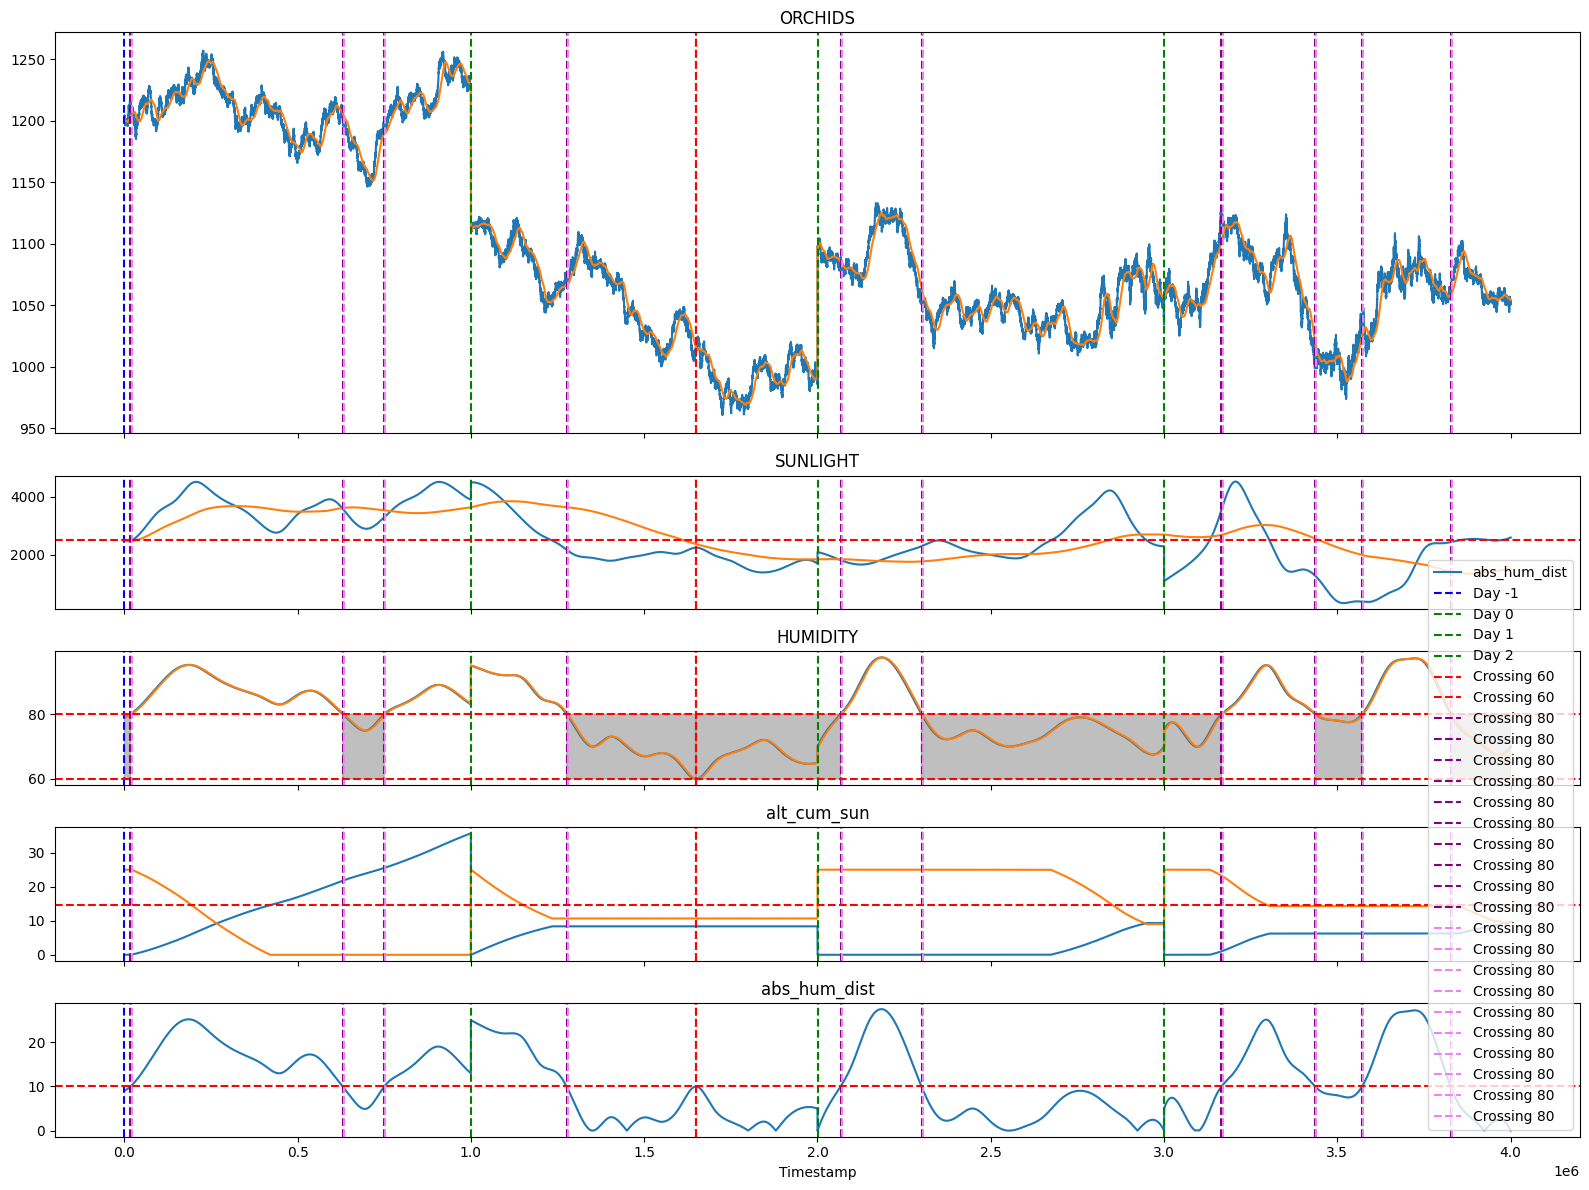

In [505]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_roll'], label='roll')
    # axs[0].plot(df['new_timestamp'], df['orchid_roll_shift'], label='roll_shift')
    # axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [506]:
# target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
# target_humidity_df.head(50)

In [507]:
orchids_cleaned = orchids[(orchids['day'] <= 2)].dropna().copy() #  & (orchids['SUNLIGHT'] < 2500)  &  (orchids['abs_hum_dist'] <= 10)
X = orchids_cleaned[features_mid_hum].copy()
y = orchids_cleaned['orchid_roll_rel_shift']
z = orchids_cleaned['orchid_roll_up_down']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_roll,sun_change,sun_diff,alt_sun_diff,alter_sun,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_shift,orchid_roll,orchid_roll_diff,orchid_roll_rel,orchid_roll_rel_shift,orchid_diff_shift,orchid_up_down,orchid_roll_diff_shift,orchid_roll_up_down,transport_diff,export_diff,import_diff
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.000000,0.002500,24.995714,0.004286,2499.709850,-2.321200,-0.5803,0.0000,0.0000,9.004100,9.004100,0.0,8136.374771,1.0,0,1,51.898734,0.004100,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1204.25,1200.875000,0.875000,0.875000,999.693966,-0.50,-1.0,0.039618,0.0,0.0,-1.0,0.0
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.000000,0.002500,24.995714,0.004286,2499.421800,-2.296533,-0.5740,0.0000,0.0000,9.008210,9.008210,0.0,8169.884086,1.0,0,1,52.022617,0.004110,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1204.75,1201.166667,0.291667,1.166667,999.737179,0.50,0.0,0.043214,0.0,0.0,0.0,0.0
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.000000,0.002500,24.995714,0.004286,2499.135850,-2.271849,-0.5677,0.0000,0.0000,9.012340,9.012340,0.0,8203.695480,1.0,0,1,52.273049,0.004130,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1204.25,1201.312500,0.145833,1.312500,999.775424,-0.50,-1.0,0.038244,0.0,0.0,0.0,0.0
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.000000,0.002500,24.995714,0.004286,2498.852000,-2.247148,-0.5614,0.0000,0.0000,9.016490,9.016490,0.0,8237.811558,1.0,0,1,52.523441,0.004150,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1204.75,1201.400000,0.087500,1.400000,999.817227,0.50,0.0,0.041803,0.0,0.0,0.0,0.0
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,500,0.000000,0.002500,24.995714,0.004286,2498.570233,-2.222830,-0.5552,0.0000,0.0000,9.020660,9.020660,0.0,8272.234955,1.0,0,1,52.773794,0.004170,0.004170,0,0.0,79.010300,9.010300,9.010300,79.010300,99.995,47603.065376,225.260440,225.260440,0.0,-1.50,1205.75,1201.208333,-0.191667,1.208333,999.866667,1.00,0.0,0.049440,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39884,2,988100,1058.00,0.8,8.0,-4.0,2546.2300,68.451584,3988400,25.462300,9.363649,8.948031,16.051969,1502.097702,1.390484,0.3540,0.3540,46.2300,-1.548416,1.548416,0.0,4.704013,1.0,0,1,139.738716,0.009564,-0.009564,0,-0.0,82.346580,12.346580,12.346580,68.162722,90.119,19499.378206,-39.426233,39.426233,0.0,-0.25,1052.00,1057.380000,-0.012500,1.380000,998.527500,0.25,0.0,-0.017500,-1.0,0.0,0.0,0.0
39885,2,988200,1056.50,0.8,8.0,-4.0,2546.5852,68.461210,3988500,25.465852,9.366195,8.943666,16.056334,1502.277642,1.395004,0.3552,0.3552,46.5852,-1.538790,1.538790,0.0,4.658950,1.0,0,1,140.624942,0.009626,-0.009626,0,-0.0,82.345175,12.345175,12.345175,68.170538,90.118,19500.837131,-39.186598,39.186598,0.0,-1.50,1051.00,1057.345000,-0.035000,1.345000,998.505000,-1.00,-1.0,-0.022500,-1.0,0.0,0.0,0.0
39886,2,988300,1057.00,0.8,8.0,-4.0,2546.9421,68.470894,3988600,25.469421,9.368742,8.939299,16.060701,1502.457671,1.401485,0.3569,0.3569,46.9421,-1.529106,1.529106,0.0,4.614050,1.0,0,1,141.452364,0.009684,-0.009684,0,-0.0,82.343771,12.343771,12.343771,68.178405,90.117,19491.915864,-38.945444,38.945444,0.0,0.50,1051.75,1057.308750,-0.036250,1.308750,998.488750,0.75,0.0,-0.016250,-1.0,0.0,0.0,0.0
39887,

In [508]:
X_train_scaled = X[orchids_cleaned['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X[orchids_cleaned['day'] > 1]# X_test # scaler.transform(X_test) # 
y_train = y[orchids_cleaned['day'] <= 1]
y_test = y[orchids_cleaned['day'] > 1]
z_train = z[orchids_cleaned['day'] <= 1]
z_test = z[orchids_cleaned['day'] > 1]

In [509]:
%%time

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=39)

X_train_const = sm.add_constant(X_train_scaled) 

# Initialize the Linear Regression model
lin_reg_sm = sm.OLS(y_train, X_train_const).fit() # LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Make predictions using the testing set
X_test_const = sm.add_constant(X_test_scaled) 
lin_pred = lin_reg_sm.predict(X_test_const)

# Initialize the Random Forest Regressor
forest_clf = RandomForestClassifier(n_estimators=500, max_depth=4, min_samples_leaf=1000, random_state=42)

# Train the model
forest_clf.fit(X_train_scaled, z_train)

# Make predictions using the testing set
forest_pred = forest_clf.predict(X_test_scaled)

CPU times: total: 9.19 s
Wall time: 9.17 s


In [510]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

feature_names = X_train_const.columns
coefficients = lin_reg_sm.params

print(lin_reg_sm.summary())

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

'''
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg.intercept_)
'''
# Calculate metrics for Random Forest Classifier
accuracy = accuracy_score(z_test, forest_pred)
precision = precision_score(z_test, forest_pred, average='macro', zero_division=0)  # Adjust average as needed
recall = recall_score(z_test, forest_pred, average='macro')  # Adjust average as needed
f1 = f1_score(z_test, forest_pred, average='macro')  # Adjust average as needed

# Print results for Random Forest Classifier
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

                              OLS Regression Results                             
Dep. Variable:     orchid_roll_rel_shift   R-squared:                       0.567
Model:                               OLS   Adj. R-squared:                  0.567
Method:                    Least Squares   F-statistic:                     9694.
Date:                   Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                           15:10:44   Log-Likelihood:            -1.4334e+05
No. Observations:                  29658   AIC:                         2.867e+05
Df Residuals:                      29653   BIC:                         2.867e+05
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

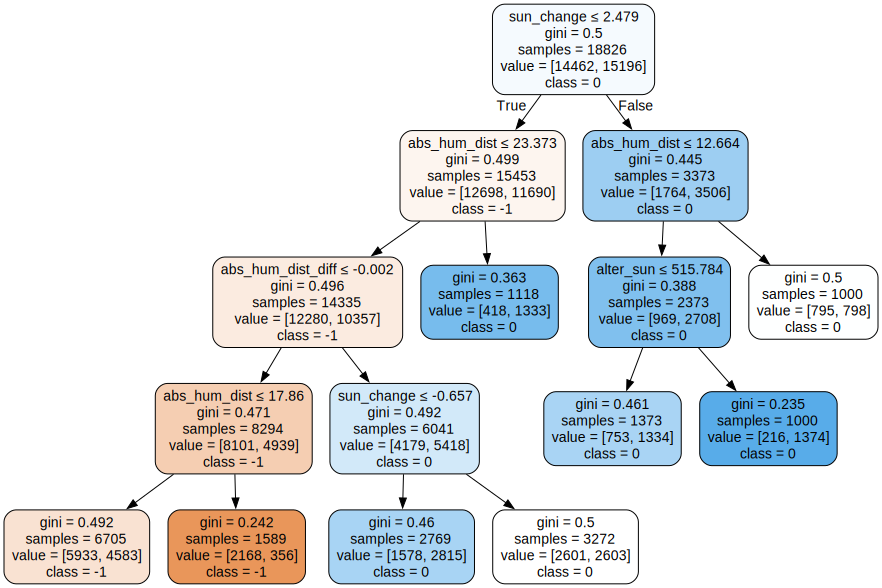

In [511]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_clf.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train_scaled.columns,
                              class_names=['-1', '0', '1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_r2_test")  # This saves the tree visualization to a file
graph_rf

In [423]:
# prices_0.head(50)

In [424]:
print(orchids_cleaned.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  20976.000000   20976.000000  20976.000000    20976.000000   
mean       0.750143  590093.931159   1048.617575        1.126707   
std        0.877191  271265.409068     47.045207        0.287255   
min       -1.000000     100.000000    960.750000        0.700000   
25%        0.000000  425475.000000   1017.000000        0.900000   
50%        1.000000  619900.000000   1045.750000        1.100000   
75%        1.000000  822425.000000   1071.000000        1.300000   
max        2.000000  998600.000000   1215.750000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   20976.000000   20976.000000  20976.000000  20976.000000   
mean        9.435855      -3.854047   2184.372454     72.250047   
std         1.363861       1.334910    745.378697      4.639797   
min         7.500000      -8.000000    343.646400     60.000000   
25%         8.500000      -5.000000   1831.915775   

In [425]:
print(orchids_cleaned1.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  18967.000000   18967.000000  18967.000000    18967.000000   
mean       0.223283  398968.076132   1142.500619        1.326441   
std        1.278960  272835.328841     68.793451        0.268334   
min       -1.000000     100.000000    998.750000        0.800000   
25%       -1.000000  181000.000000   1079.875000        1.200000   
50%        0.000000  311000.000000   1118.500000        1.300000   
75%        2.000000  615850.000000   1210.750000        1.500000   
max        2.000000  998600.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   18967.000000   18967.000000  18967.000000  18967.000000   
mean        9.745795      -3.415585   2981.439151     88.284294   
std         1.584380       1.183578   1129.593888      4.934636   
min         8.000000      -6.000000    382.054750     59.999580   
25%         8.500000      -4.000000   2104.446300   

In [426]:
feature_names1

Index(['const', 'alter_sun', 'abs_hum_dist'], dtype='object')

In [427]:
coefficients1

const          -35.222864
alter_sun        0.016590
abs_hum_dist     1.303707
dtype: float64

In [428]:
%%time
def apply_model(row):
    if row['abs_hum_dist'] > 10:
        return sum(row[feature_names1[feature_names1 != 'const']] * coefficients1[feature_names1 != 'const']) + coefficients1[feature_names1 == 'const']
    else:
        return sum(row[feature_names[feature_names != 'const']] * coefficients[feature_names != 'const']) + coefficients[feature_names == 'const']

orchids['preds'] = orchids.apply(apply_model, axis=1)
orchids[orchids['abs_hum_dist'] < 10]

CPU times: total: 13.7 s
Wall time: 13.7 s


,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_roll,sun_change,sun_diff,alt_sun_diff,alter_sun,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_shift,orchid_roll,orchid_roll_diff,orchid_roll_rel,orchid_roll_rel_shift,orchid_diff_shift,orchid_up_down,orchid_roll_diff_shift,orchid_roll_up_down,transport_diff,export_diff,import_diff,preds
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,0,25.000000,0.002500,24.995714,0.004286,2500.000000,NaN,NaN,NaN,0.0000,9.000000,9.000000,0.0,8103.083928,1.0,0,1,NaN,NaN,NaN,0,NaN,79.000000,9.000000,9.000000,79.000000,100.000,NaN,225.000000,225.000000,0.0,NaN,1199.75,1200.000000,NaN,0.000000,1.000,0.0,0.0,-0.875,-1.0,NaN,NaN,NaN,-63.696614
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.000000,0.002500,24.995714,0.004286,2499.709850,-2.321200,-0.5803,0.0000,0.0000,9.004100,9.004100,0.0,8136.374771,1.0,0,1,51.898734,0.004100,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1199.75,1200.875000,0.875000,0.875000,0.250,0.0,0.0,-0.750,-1.0,0.0,-1.0,0.0,-63.693296
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.000000,0.002500,24.995714,0.004286,2499.421800,-2.296533,-0.5740,0.0000,0.0000,9.008210,9.008210,0.0,8169.884086,1.0,0,1,52.022617,0.004110,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1199.75,1201.166667,0.291667,1.166667,-0.250,0.0,0.0,-0.500,-1.0,0.0,0.0,0.0,-63.689969
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.000000,0.002500,24.995714,0.004286,2499.135850,-2.271849,-0.5677,0.0000,0.0000,9.012340,9.012340,0.0,8203.695480,1.0,0,1,52.273049,0.004130,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1198.25,1201.312500,0.145833,1.312500,-0.625,-1.5,-1.0,-0.375,-1.0,0.0,0.0,0.0,-63.686627
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.000000,0.002500,24.995714,0.004286,2498.852000,-2.247148,-0.5614,0.0000,0.0000,9.016490,9.016490,0.0,8237.811558,1.0,0,1,52.523441,0.004150,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1199.25,1201.750000,0.437500,1.750000,-0.750,1.0,0.0,-0.125,-1.0,0.0,0.0,0.0,-63.683268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,2,999500,1052.00,0.8,8.0,-4.0,2597.2483,69.917725,3999800,25.972483,9.656645,8.445751,16.554249,1523.395503,2.098430,0.5449,0.5449,97.2483,-0.082275,0.082275,0.0,1.085754,1.0,0,1,232.684696,0.016265,-0.016265,0,-0.0,82.195822,12.195822,12.195822,69.404985,90.005,1723.067727,-2.136886,2.136886,0.0,0.25,NaN,1052.500000,-0.125000,-3.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-69.163534
39999,2,999600,1051.00,0.8,8.0,-4.0,2597.7950,69.934050,3999900,25.977950,9.659243,8.441298,16.558702,1523.591291,2.104920,0.5467,0.5467,97.7950,-0.065950,0.065950,0.0,1.068173,1.0,0,1,233.488718,0.016325,-0.016325,0,-0.0,82.194595,12.194595,12.194595,69.419192,90.004,1385.933882,-1.713246,1.713246,0.0,-1.00,NaN,1051.812500,-0.687500,-4.187500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-69.166907
40000,2,999700,1051.75,0.8,8.0,-4.0,2598.3435,69.950450,4000000,25.983435,9.661841,8.436843,16.563157,1523.787269,2.111406,0.5485,0.5485,98.3435,-0.049550,0.049550,0.0,1.050798,1.0,0,1,234.506653,0.016400,-0.016400,0,-0.0,82.193370,12.193370,12.193370,69.433459,90.003,1045.817279,-1.287479,1.287479,0.0,0.75,NaN,1051.625000,-0.187500,-4.375000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-69.170308
40001,2,999800,1052.50,0.8,8.0,-4.0,2598.8938,69.966900

In [429]:
orchids['preds'].max()

30.586746115706582

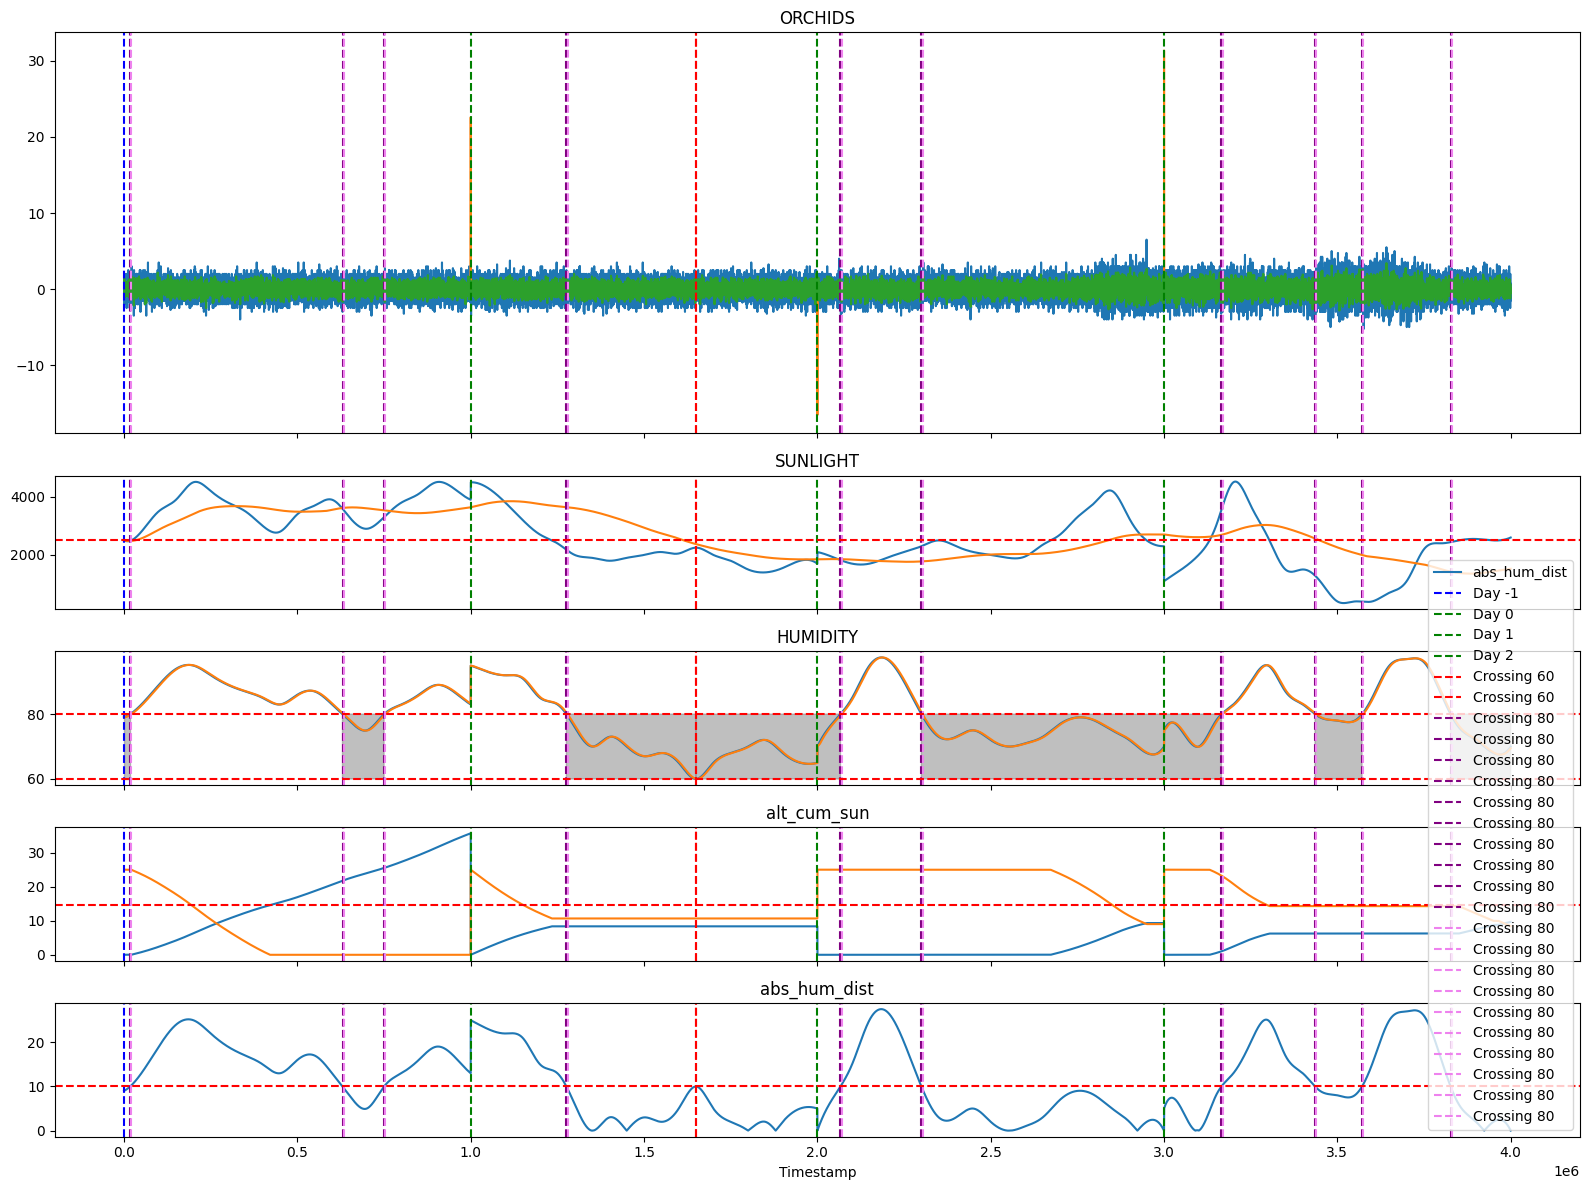

In [291]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['orchid_diff_shift'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['preds'], label='preds')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_diff_shift'], label='roll_diff_shift')
    # axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [ ]:
Run above this line

In [442]:
orchids_cleaned1 = orchids[(orchids['abs_hum_dist'] > 10)].dropna().copy() #  & (orchids['day'] <= 1)
X2 = orchids_cleaned1[features_hl_hum].copy()
y2 = orchids_cleaned1['orchid_roll_rel_shift']
z2 = orchids_cleaned1['orchid_roll_up_down']
orchids_cleaned1

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_roll,sun_change,sun_diff,alt_sun_diff,alter_sun,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_shift,orchid_roll,orchid_roll_diff,orchid_roll_rel,orchid_roll_rel_shift,orchid_diff_shift,orchid_up_down,orchid_roll_diff_shift,orchid_roll_up_down,transport_diff,export_diff,import_diff
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,0.0,0.002500,24.995714,0.004286,2479.174171,1.537992,0.3824,0.0,0.0,10.006966,10.006966,0.006966,22180.437817,1.006990,1,1,89.575224,0.007166,0.007166,0,1.0,79.458149,9.458149,9.458149,79.772096,99.823,89478.963448,248.847326,248.847326,0.173226,-0.25,1210.25,1215.3750,0.4375,15.3750,9.6875,0.00,0.0,0.500,0.0,0.0,0.0,0.0
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,0.0,0.002500,24.995714,0.004286,2479.218604,1.555047,0.3867,0.0,0.0,10.014150,10.014150,0.014150,22340.355820,1.014251,1,1,89.792181,0.007184,0.007184,0,1.0,79.461255,9.461255,9.461255,79.778728,99.822,89759.181040,249.064699,249.064699,0.351929,0.25,1210.00,1215.5000,0.1250,15.5000,10.0625,-0.25,-1.0,0.375,0.0,0.1,0.0,0.0
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,0.0,0.002500,24.995714,0.004286,2479.264719,1.574507,0.3916,0.0,0.0,10.021350,10.021350,0.021350,22501.786837,1.021580,1,1,89.984084,0.007200,0.007200,0,1.0,79.464367,9.464367,9.464367,79.785376,99.821,90014.784686,249.283015,249.283015,0.531085,-1.00,1210.25,1215.4375,-0.0625,15.4375,10.1875,0.25,0.0,0.125,0.0,0.0,0.0,0.0
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,0.0,0.002500,24.995714,0.004286,2479.312513,1.591947,0.3960,0.0,0.0,10.028564,10.028564,0.028564,22664.701654,1.028976,1,1,90.150941,0.007214,0.007214,0,1.0,79.467484,9.467484,9.467484,79.792041,99.820,90245.712909,249.502178,249.502178,0.710648,-1.50,1211.25,1214.8125,-0.6250,14.8125,10.4375,1.00,0.0,0.250,0.0,0.0,0.0,0.0
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,0.0,0.002500,24.995714,0.004286,2479.361982,1.610585,0.4007,0.0,0.0,10.035790,10.035790,0.035790,22829.069936,1.036438,1,1,90.292761,0.007226,0.007226,0,1.0,79.470606,9.470606,9.470606,79.798721,99.819,90451.903948,249.722168,249.722168,0.890568,-1.50,1210.25,1213.8750,-0.9375,13.8750,10.4375,-1.00,-1.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38264,2,826100,1064.00,1.3,8.0,-4.0,2438.9448,80.093860,3826400,0.0,6.236097,14.309547,10.690453,1427.371925,0.995202,0.2427,0.0,0.0,10.093860,10.093860,0.093860,24194.001270,1.098406,1,1,-255.559760,-0.020474,-0.020474,1,-1.0,84.420957,14.420957,14.420957,80.816904,91.739,-236648.497207,246.183674,246.183674,2.289194,-0.25,1061.75,1064.2500,0.2500,8.2500,6.0625,-1.75,-1.0,0.000,0.0,0.0,0.0,0.0
38265,2,826200,1063.00,1.3,8.0,-4.0,2439.1880,80.073400,3826500,0.0,6.236097,14.309547,10.690453,1427.124955,0.997153,0.2432,0.0,0.0,10.073400,10.073400,0.073400,23704.021588,1.076161,1,1,-255.450293,-0.020460,-0.020460,1,-1.0,84.420431,14.420431,14.420431,80.795728,91.738,-236065.081966,245.709164,245.709164,1.790364,-1.00,1062.50,1063.7500,-0.5000,7.7500,6.5625,0.75,0.0,0.500,0.0,0.0,0.0,0.0
38266,2,826300,1061.50,1.3,8.0,-4.0,2439.4316,80.052970,3826600,0.0,6.236097,14.309547,10.690453,1426.878468,0.998693,0.2436,0.0,0.0,10.052970,10.052970,0.052970,23224.661761,1.054398,1,1,-255.140908,-0.020430,-0.020430,1,-1.0,84.419903,14.419903,14.419903,80.774572,91.737,-235298.423454,245.235327,245.235327,1.292167,-1.50,1063.50,1063.1875,-0.5625,7.1875,6.8125,1.00,0.0,0.250,0.0,0.0,0.0,0.0
38267,2,8

In [443]:
X_train_scaled1 = X2[orchids_cleaned1['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_test_scaled1 = X2[orchids_cleaned1['day'] > 1]# X_test # scaler.transform(X_test) # 
y_train1 = y2[orchids_cleaned1['day'] <= 1]
y_test1 = y2[orchids_cleaned1['day'] > 1]
z_train1 = z2[orchids_cleaned1['day'] <= 1]
z_test1 = z2[orchids_cleaned1['day'] > 1]

In [444]:
%%time

# Split the data into training and testing sets
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=39)

# X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
# X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

X_train_const1 = sm.add_constant(X_train_scaled1) 

# Initialize the Linear Regression model
lin_reg_sm1 = sm.OLS(y_train1, X_train_const1).fit() # LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Make predictions using the testing set
X_test_const1 = sm.add_constant(X_test_scaled1)
lin_pred1 = lin_reg_sm1.predict(X_test_const1)

# Initialize the Random Forest Regressor
forest_clf1 = RandomForestClassifier(n_estimators=250, max_depth=4, min_samples_leaf=1000, random_state=42)

# Train the model
forest_clf1.fit(X_train_scaled1, z_train1)

# Make predictions using the testing set
forest_pred1 = forest_clf1.predict(X_test_scaled1)

CPU times: total: 1.14 s
Wall time: 1.15 s


In [445]:
# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

feature_names1 = X_train_const1.columns
coefficients1 = lin_reg_sm1.params

print(lin_reg_sm1.summary())


print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

'''
for feature, coef in zip(feature_names1, coefficients1):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg1.intercept_)
'''

# Calculate metrics for Random Forest Classifier
accuracy = accuracy_score(z_test1, forest_pred1)
precision = precision_score(z_test1, forest_pred1, average='macro', zero_division=0)  # Adjust average as needed
recall = recall_score(z_test1, forest_pred1, average='macro')  # Adjust average as needed
f1 = f1_score(z_test1, forest_pred1, average='macro')  # Adjust average as needed

# Print results for Random Forest Classifier
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

                              OLS Regression Results                             
Dep. Variable:     orchid_roll_rel_shift   R-squared:                       0.430
Model:                               OLS   Adj. R-squared:                  0.430
Method:                    Least Squares   F-statistic:                     3452.
Date:                   Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:59:13   Log-Likelihood:                -59452.
No. Observations:                  13711   AIC:                         1.189e+05
Df Residuals:                      13707   BIC:                         1.189e+05
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          292

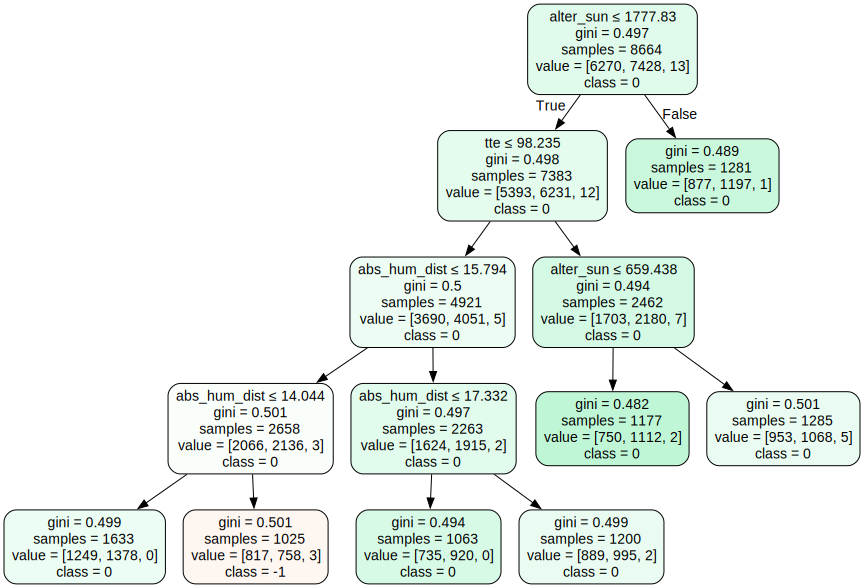

In [446]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator1 = forest_clf1.estimators_[0]

dot_data_rf1 = export_graphviz(estimator1, out_file=None,
                              feature_names=X_train_scaled1.columns,
                              class_names=['-1','0','1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf1 = graphviz.Source(dot_data_rf1)
graph_rf1.render("random_forest_tree_r2test1")  # This saves the tree visualization to a file
graph_rf1

In [215]:
max_lags = 20
test_result = grangercausalitytests(orchids.loc[orchids['day']<=1][['ORCHIDS', 'HUMIDITY']], maxlag=max_lags)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4614  , p=0.1167  , df_denom=29999, df_num=1
ssr based chi2 test:   chi2=2.4616  , p=0.1167  , df=1
likelihood ratio test: chi2=2.4615  , p=0.1167  , df=1
parameter F test:         F=2.4614  , p=0.1167  , df_denom=29999, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2737  , p=0.2798  , df_denom=29996, df_num=2
ssr based chi2 test:   chi2=2.5479  , p=0.2797  , df=2
likelihood ratio test: chi2=2.5478  , p=0.2797  , df=2
parameter F test:         F=1.2737  , p=0.2798  , df_denom=29996, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0964  , p=0.0984  , df_denom=29993, df_num=3
ssr based chi2 test:   chi2=6.2908  , p=0.0983  , df=3
likelihood ratio test: chi2=6.2901  , p=0.0983  , df=3
parameter F test:         F=2.0964  , p=0.0984  , df_denom=29993, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5771  

In [214]:
max_lags = 20
test_result = grangercausalitytests(orchids.loc[orchids['day']<=1][['ORCHIDS', 'SUNLIGHT']], maxlag=max_lags)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5994  , p=0.2060  , df_denom=29999, df_num=1
ssr based chi2 test:   chi2=1.5996  , p=0.2060  , df=1
likelihood ratio test: chi2=1.5995  , p=0.2060  , df=1
parameter F test:         F=1.5994  , p=0.2060  , df_denom=29999, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8248  , p=0.4383  , df_denom=29996, df_num=2
ssr based chi2 test:   chi2=1.6499  , p=0.4382  , df=2
likelihood ratio test: chi2=1.6499  , p=0.4383  , df=2
parameter F test:         F=0.8248  , p=0.4383  , df_denom=29996, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6910  , p=0.1665  , df_denom=29993, df_num=3
ssr based chi2 test:   chi2=5.0743  , p=0.1664  , df=3
likelihood ratio test: chi2=5.0739  , p=0.1665  , df=3
parameter F test:         F=1.6910  , p=0.1665  , df_denom=29993, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2707  